# Project Report

## Research Question

The film industry is interestingly where art and commerce intersect. Our interaction with film and the industry has been in the context of a consumer. Being able to understand what drives audiences to theaters will allow us to gain a deeper understanding of film through a different perspective. As an industry with so much culture and history, we hope to explore the story of cinema. 

We hope to explore: **What key factors influence a movie's box office success, and how do these factors differ across various genres?**

## Data Description

**What are the observations (rows) and the attributes (columns)?**  
Rows: each row in the dataset represents a unique movie.  
Columns:
- belongs_to_collection: The series that the movie is a part of, if applicable
- budget: The budget used to produce the movie, in dollars
- genres: The genres that the movie is a part of
- id: The identifier for the movie used by MovieLens
- imdb_id: The identifier for the movie used by IMDB
- original_language: The original language that the movie was produced in
- original_title: The original title of the movie
- popularity: The popularity of the movie as measured by MovieLens
- production_companies: The companies involved in the production of the movie
- production_countries: The countries in which the movie was produced
- release_date: The date on which the movie was released
- revenue: The revenue generated from the movie, in dollars
- runtime: The length of the movie, in minutes
- spoken_languages: The languages spoken in the movie
- title: The title of the movie
- vote_average: The average vote of the movie by TMDB users, out of 10
- vote_count: The number of votes received by the movie on TMDB
- rating_average: The average rating of the movie by MovieLens users, out of 5
- rating_count: The number of ratings received by the movie on MovieLens

**Why was this dataset created?**  
This dataset was created by GroupLens, a research lab at the University of Minnesota, Twin Cities. The group is made up of students and faculty in the university's Department of Computer Science and Engineering. GroupLens studies social computing by building systems and analyzing their use by people. One of these systems is MovieLens, a website with thousands of registered that helps people find movies to watch. The platform is used to help researchers study content recommendation, user interface design, and other areas of interest. In creating the website, GroupLens compiled movie rating datasets that we use for our project.

**Who funded the creation of the dataset?**  
The dataset was created by the research lab GroupLens. Its creation was likely funded by this research lab, in the Department of Computer Science and Engineering at the University of Minnesota, Twin Cities.

**What processes might have influenced what data was observed and recorded and what was not?**  
The dataset relies solely on APIs from TMDB and GroupLens, which means the quality and completeness of the data depend on how these sources collect and maintain their records. If certain movies are less documented or if there are inconsistencies in data entry, this could result in missing or incomplete metadata. Movie ratings are inherently subjective and can vary significantly based on individual viewer preferences, cultural context, and personal experiences. This subjectivity introduces variability that may not accurately reflect the overall quality or success of a film. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**  
The raw source data was taken from 45,000 movies listed in the Full MovieLens Dataset. The dataset is an ensemble of data collected from TMDB and GroupLens. The Movie Details, Credits and Keywords have been collected from the TMDB Open API. The Movie Links and Ratings have been obtained from the Official GroupLens website. The dataset consists of movies released on or before July 2017. The data has been processed in our data cleaning notebook, https://github.com/ay283/info2950_project/blob/main/Data%20Cleaning.ipynb. Our steps are described in this notebook.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**  
The individual who created the dataset posted it for public use on Kaggle. There is a CC0: Public Domain license which means this dataset has been dedicated to the public domain because the creator has waived all of their rights to the work worldwide under copyright law. They hope that the dataset can help predict movie revenue/success based on certain metrics. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data.**  
https://grouplens.org/datasets/movielens/latest/

### Data Limitations

The dataset that we use will inherently have bias because movie reviews are user-generated and are subjective. Highly-rated movies may attract more votes, while lesser-known films may receive fewer ratings which can skew the average rating of a movie. There could also be temporal bias, where older movies may have fewer ratings or skewed perceptions compared to newer films that have more exposure. Genre classifications can be subjective, leading to inconsistencies in how movies are categorized. Ratings can differ significantly by region or demographic, which is not captured in the dataset. Movie review systems like IMDb are constantly updated, which can lead to versioning issues if datasets are not synchronized properly. Especially because the data contains movies released prior to or on July 2017, this does not account for the most recent movies released.

## Load Data

In [1]:
import numpy as np
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data = pd.read_csv("data/data.csv")
print(data.shape)
data.head()

(1030, 17)


,belongs_to_collection,budget,genres,id,original_english,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,month,holiday,rating_average,rating_count
0,0,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",508,1,Love Actually,10.586815,2003-09-07,244931766.0,135.0,Love Actually,7.0,1917.0,9,0,3.668605,86
1,0,42000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",509,1,Notting Hill,9.874043,1999-05-13,363889678.0,124.0,Notting Hill,7.0,1309.0,5,0,3.750000,78
2,1,65000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1271,1,300,18.108408,2006-12-09,422610419.0,117.0,300,7.0,5092.0,12,1,3.700000,40
3,0,24000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1089,1,Point Break,11.453093,1991-07-12,83531958.0,120.0,Point Break,6.9,861.0,7,1,4.162879,132
4,1,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",2770,1,American Pie 2,10.251030,2001-08-10,287553595.0,108.0,American Pie 2,6.0,1375.0,8,1,3.068627,51


## Exploratory Data Analysis

### Scatterplot of Revenue, Budget, and Popularity

Text(0.5, 1.0, 'Revenue of Movies by Budget and Popularity')

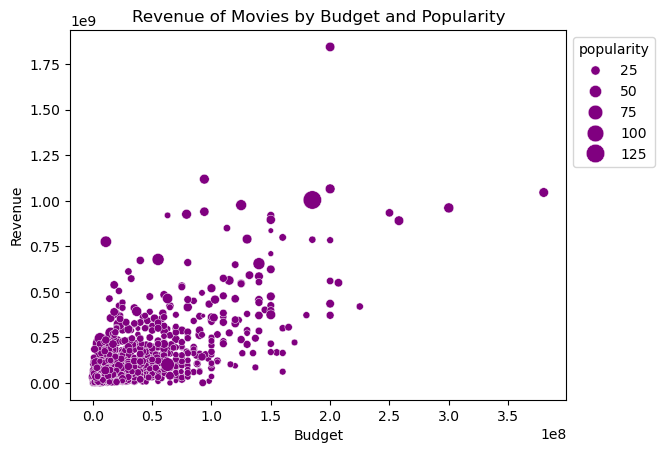

In [3]:
plot = sns.scatterplot(data, x='budget', y='revenue', color='purple', size='popularity', sizes=(10,200))
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1,1))
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue of Movies by Budget and Popularity')

This plot shows that there is a slight positive correlation between budget and revenue. The variable popularity does not have a clear correaltion with either of the other two variables.

### Scatterplot of Release Date, Runtime, and Revenue

Text(0.5, 1.0, 'Revenue of Movies by Release Date and Runtime')

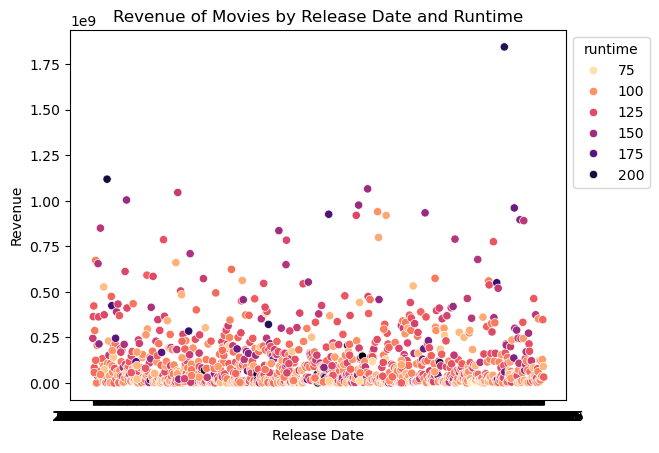

In [4]:
plot = sns.scatterplot(data, x='release_date', y='revenue', hue='runtime', palette='magma_r')
sns.move_legend(plot, 'upper left', bbox_to_anchor=(1,1))
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.title('Revenue of Movies by Release Date and Runtime')

We can see that the revenue generated by movies has generally increased over the years. This may be due to an increase in the number of movies released in recent years. In addition, the majority of the movies have a runtime of about 100 minutes. Movies with the highest amount of revenue generated tend to be longer in runtime.

### Correlation Matrix of Numeric Variables

Text(0.5, 1.0, 'Correlation Matrix of Numeric Variables')

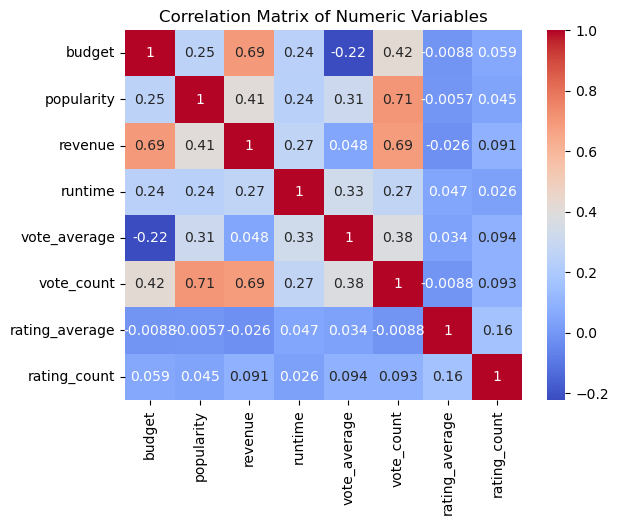

In [5]:
data_numeric = data[['budget', 'popularity', 'revenue', 'runtime', 
                     'vote_average', 'vote_count', 'rating_average', 'rating_count']]
data_corr = data_numeric.corr()
sns.heatmap(data_corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Numeric Variables')

From this matrix, we can see that revenue and budget have a high positive correlation. In addition, revenue has a high positive correlation with the number of TMDB votes received by the movie.

## Preregistration Statement

### Hypothesis: Movies with a greater budget (dollars used for production) have higher box office success compared to movies with a lower budget.

#### $H_{0}$: There is no relationship between budget and revenue

In general, a higher budget suggests that more resources and effort were put into the making of a movie. We believe this is an indicator of a higher quality movie, which would likely generate more revenue. Looking at the correlation above, revenue and budget have a strong positive correlation of 0.76. This means a greater budget is typically associated with higher revenue.

In [6]:
# Code modeled after HW4 A5
input_vars = ['budget', 'runtime']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['revenue']
model = LinearRegression().fit(X, y)

Although our hypothesis only concerns the movie's budget, we included an additional variable, `runtime`. This serves as a control that we can compare the effects of `budget` against.

In [7]:
coef = pd.DataFrame({'feature': X.columns, 'coefficient': np.round(model.coef_, 2)})
print(coef)
print(f"intercept: {round(model.intercept_, 2)}")

   feature  coefficient
0   budget         2.81
1  runtime    844483.64
intercept: -71566613.74


In [8]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

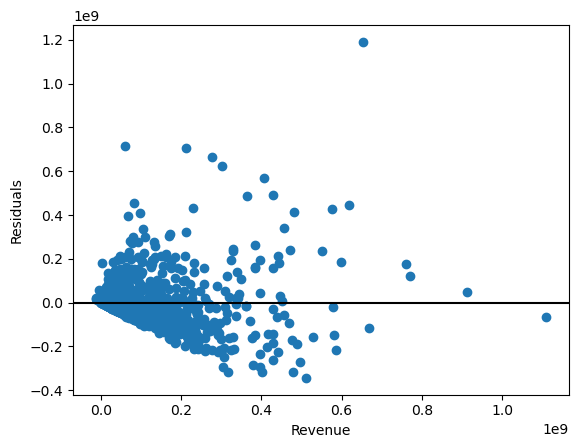

In [9]:
# Code modeled after HW4 A13
residuals = train['revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot is very clustered and not random, so we will transform some of the input variables.

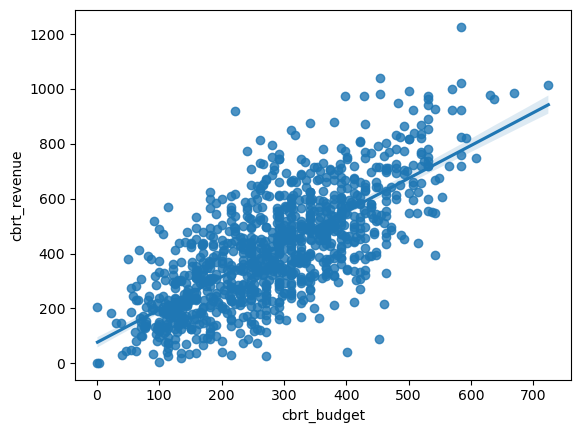

In [10]:
# Use cube root transformation on budget and revenue
data['cbrt_budget'] = np.cbrt(data['budget'])
data['cbrt_revenue'] = np.cbrt(data['revenue'])

# Plot the transformed variables with each other to observe their relationship
ax = sns.regplot(data, x='cbrt_budget', y='cbrt_revenue')

The relationship between the cubed root transformation of budget and the cubed root transformation is fairly linear.

In [11]:
input_vars = ['cbrt_budget', 'runtime']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['cbrt_revenue']
model = LinearRegression().fit(X, y)

In [12]:
coef = pd.DataFrame({'feature': X.columns, 'coefficient': np.round(model.coef_, 2)})
print(coef)
print(f"intercept: {round(model.intercept_, 2)}")

       feature  coefficient
0  cbrt_budget         1.16
1      runtime         0.81
intercept: -6.88


The coefficient for the transformed budget is about 1.16, meaning that all else equal, for every 1% increase in the movie's budget, the revenue is expected to increase by about 1.16%, all else equal. As for the runtime, all else equal, for every 1% increase in the movie's runtime, the revenue is expected to increase by 0.81%, all else equal. Both budget and runtime have a positive correlation with revenue.

In [13]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

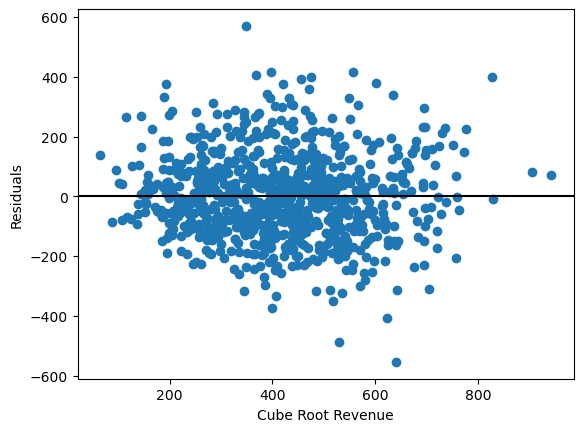

In [14]:
residuals = train['cbrt_revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Cube Root Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot for the transformed variables is random and scattered, meaning a linear regression is appropriate for this data.

In [15]:
Y = data['cbrt_revenue']
x = data[input_vars]
x = sm.add_constant(x)
model = sm.OLS(Y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cbrt_revenue   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     571.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          1.71e-167
Time:                        09:20:04   Log-Likelihood:                -6560.2
No. Observations:                1030   AIC:                         1.313e+04
Df Residuals:                    1027   BIC:                         1.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.8764     24.070     -0.286      

The p_value for `cbrt_budget` is 0.000, which is lower than our significance level of 0.05. This means that this value is statistically significant, and we can reject our null hypothesis that there is no relationship between budget and revenue. 

## Preregistration Statement

### Hypothesis: Movies released in holiday seasons (Summer and Winter) have higher box office success compared to movies released in the Spring and Fall seasons.

#### $H_{0}$: There is no relationship between season the movie was released (holiday vs non-holiday) and revenue

In [16]:
input_vars = ['holiday', 'belongs_to_collection', 'original_english']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['cbrt_revenue']
model = LinearRegression().fit(X, y)

Although our hypothesis only concerns the movie's season of release, we included additional variables, `belongs_to_collection` and `original_english`. These serve as control variables that we can compare the effects of `holiday` against.

In [17]:
coef = pd.DataFrame({'feature': X.columns, 'coefficient': np.round(model.coef_, 2)})
print(coef)
print(f"intercept: {round(model.intercept_, 2)}")

                 feature  coefficient
0                holiday        23.23
1  belongs_to_collection       150.52
2       original_english       147.72
intercept: 219.88


In [18]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

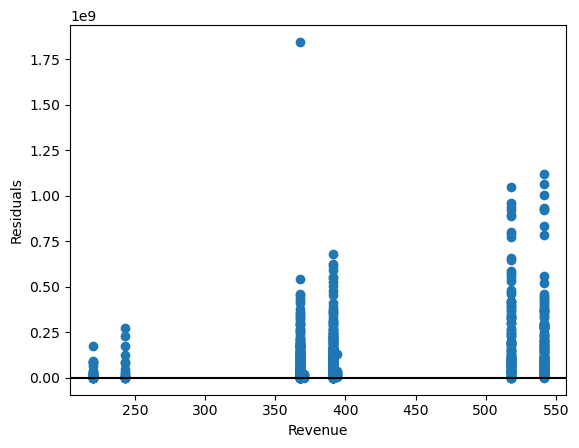

In [19]:
residuals = train['revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot is very clustered and not random, so we will transform some of the input variables.

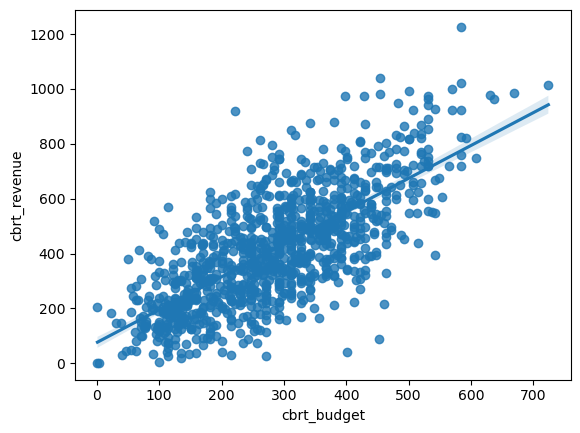

In [20]:
# CHANGE

# Use cube root transformation on budget and revenue
data['cbrt_budget'] = np.cbrt(data['budget'])
data['cbrt_revenue'] = np.cbrt(data['revenue'])

# Plot the transformed variables with each other to observe their relationship
ax = sns.regplot(data, x='cbrt_budget', y='cbrt_revenue')

The relationship between the ________ transformation of budget and the __________ transformation is fairly linear.

In [21]:
input_vars = ['holiday', 'belongs_to_collection', 'original_english']
train, test = train_test_split(data, test_size=0.2)
X = data[input_vars]
y = data['cbrt_revenue']
model = LinearRegression().fit(X, y)

In [22]:
coef = pd.DataFrame({'feature': X.columns, 'coefficient': np.round(model.coef_, 2)})
print(coef)
print(f"intercept: {round(model.intercept_, 2)}")

                 feature  coefficient
0                holiday        23.23
1  belongs_to_collection       150.52
2       original_english       147.72
intercept: 219.88


CHANGE

The coefficient for the transformed budget is about 1.16, meaning that all else equal, for every 1% increase in the movie's budget, the revenue is expected to increase by about 1.16%, all else equal. As for the runtime, all else equal, for every 1% increase in the movie's runtime, the revenue is expected to increase by 0.81%, all else equal. Both budget and runtime have a positive correlation with revenue.

In [23]:
train_pred = model.predict(train[input_vars])
test_pred = model.predict(test[input_vars])

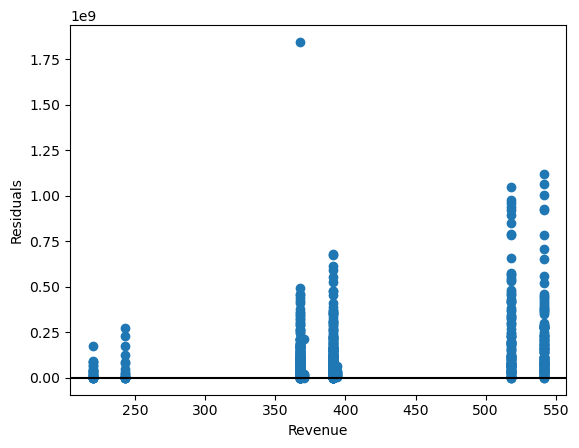

In [24]:
residuals = train['revenue'] - train_pred

def generate_residual_plot(pred, resid):
    plt.scatter(pred, resid, marker="o")
    plt.xlabel("Revenue")
    plt.ylabel("Residuals")
    plt.axhline(y=0, color="black")

generate_residual_plot(train_pred, residuals)

The residual plot for the transformed variables is random and scattered, meaning a linear regression is appropriate for this data.

In [25]:
Y = data['cbrt_revenue']
x = data[input_vars]
x = sm.add_constant(x)
model = sm.OLS(Y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           cbrt_revenue   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     64.45
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.52e-38
Time:                        09:20:04   Log-Likelihood:                -6856.4
No. Observations:                1030   AIC:                         1.372e+04
Df Residuals:                    1026   BIC:                         1.374e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   219.87

The p_value for `holiday` is 0.049, which is lower than our significance level of 0.05. This means that this value is statistically significant, and we can reject our null hypothesis that there is no relationship between holiday season and revenue. 

## Conclusions

### What key factors influence a movie's box office success, and how do these factors differ across various genres?

Based on our analyses, a movie's budget is a large influence in its box office success. In addition, the season in which the movie was released is also a factor in determining its success. A high budget used to produce the movie is a predictor of a higher revenue generated. As for the season, movies released in a holiday season, either winter (December-February) or summer (June-August), typically generate higher revenue.

## Bibliography

HW4 A5, A13 for linear regression and residual plot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html - create dataframe of regression coefficients

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html